In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import re
import os
tf.__version__
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/train.csv")
# df_val = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/val.csv")


In [3]:
# def clean_data(text):
#     text = text.lower()
#     text = re.sub(r"[-=+*\"#@!$%^&()`<>\[\]]","",text)
#     text = re.sub(r"i'm","i am",text)
#     text = re.sub(r"he's","he is",text)
#     text = re.sub(r"she's","she is",text)
#     text = re.sub(r"it's","it is",text)
#     text = re.sub(r"they're","they are",text)
#     text = re.sub(r"there're","there are",text)
#     text = re.sub(r"there's","there is",text)
#     text = re.sub(r"how're","how are",text)
#     text = re.sub(r"what're","what are",text)
#     text = re.sub(r"where're","where ",text)
#     text = re.sub(r"who're","who are",text)
#     text = re.sub(r"that're","that are",text)
#     text = re.sub(r"when're","when are",text)
#     text = re.sub(r"how's","how is",text)
#     text = re.sub(r"what's","what is",text)
#     text = re.sub(r"where's","where is",text)
#     text = re.sub(r"who's","who is",text)
#     text = re.sub(r"that's","that is",text)
#     text = re.sub(r"when's","when is",text)
#     text = re.sub(r"won't","would not",text)
#     text = re.sub(r"nt't","can not",text)
#     text = re.sub(r"\'bout'","about",text)
#     text = re.sub(r"\'till'","untill",text)
#     text = re.sub(r"\'ll","will",text)
#     text = re.sub(r"\'ve","have",text)
#     text = re.sub(r"\'re","are",text)
#     text = re.sub(r"\'d","would",text)
#     text = re.sub(r"\."," ",text)
#     text = re.sub(r"\,"," ",text)
#     text = re.sub(r"\!"," ",text)
#     text = re.sub(r"\?"," ",text)
#     text = re.sub(r"\;"," ",text)
#     text = re.sub(r"\:"," ",text)
#     return text

    
# df['text'] = df['text'].apply(clean_data)
# df['augmented_text'] = df['augmented_text'].apply(clean_data)
# df_val['text'] = df['text'].apply(clean_data)
# df_val['augmented_text'] = df['augmented_text'].apply(clean_data)
# data = pd.concat([df_train,df_val])


In [4]:
#data.csv is being pre-process to save time for training
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Copy of data.csv')

In [5]:
max_length = 8

In [6]:
df = data[data['text'].apply(lambda x: len(x.split(" "))< max_length +1)]

In [7]:
# df = df[:82000]
train_df = df['augmented_text']
test_df = df['text']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_df, test_df, test_size=0.2, random_state=24)
val_x, test_x,val_y, test_y = train_test_split(test_x, test_y, test_size = 0.5, random_state=24)


In [8]:
train_x

402452               elagl fight over alp cmapagin brochure
45026                 0sczrs qhoq goes on but no red dar0et
658341     solar hokd precibft launched in qbite gum valley
207624      apm housing rental eroprt darwin most expenisev
917206           us soldier klilde 4 uhtr in abgdhad attack
                                ...                        
577944                 airoptr sells benefits of new urcfew
623630             chxllehge for tasmanias housing inwusfry
254890    action group clasrifies menindee nwatecr situa...
1081         qarkizy criticises us yustic2 in polsnzki case
292316         oppoistoin questions power sattoin viability
Name: augmented_text, Length: 611100, dtype: object

In [9]:
train_y

402452              legal fight over alp campaign brochure
45026                oscars show goes on but no red carpet
658341    solar home precinct launched in white gum valley
207624     apm housing rental report darwin most expensive
917206          us soldier killed 4 hurt in baghdad attack
                                ...                       
577944                airport sells benefits of new curfew
623630            challenge for tasmanias housing industry
254890     action group clarifies menindee water situation
1081        sarkozy criticises us justice in polanski case
292316        opposition questions power station viability
Name: text, Length: 611100, dtype: object

In [10]:

g_text_tokenizer = Tokenizer()
g_text_tokenizer.fit_on_texts(train_x)
g_text_word_index = g_text_tokenizer.word_index
train_sequences = g_text_tokenizer.texts_to_sequences(train_x)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding='post')


text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(train_y)
text_word_index = text_tokenizer.word_index
test_sequences = text_tokenizer.texts_to_sequences(train_y)
test_padded = pad_sequences(test_sequences,maxlen = max_length, padding='post')





In [11]:
val_train_sequences = g_text_tokenizer.texts_to_sequences(val_x)
val_train_padded = pad_sequences(val_train_sequences, maxlen = max_length, padding='post')

val_test_sequences = text_tokenizer.texts_to_sequences(val_y)
val_test_padded = pad_sequences(val_test_sequences, maxlen = max_length, padding='post')

In [12]:
g_vocab_size = len(g_text_word_index)+1
vocab_size = len(text_word_index)+1
print(g_vocab_size, vocab_size)

844814 79061


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=256, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(vocab_size,activation='softmax')
])
learning_rate = 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate)

# optimizer = tf.keras.optimizers.RMSprop(learning_rate)
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])

In [14]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=128, input_length=max_length, mask_zero=True),
#     tf.keras.layers.LSTM(128),
#     tf.keras.layers.RepeatVector(max_length),
#     tf.keras.layers.LSTM(128,return_sequences=True),
#     tf.keras.layers.LSTM(128,return_sequences=True),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(vocab_size,activation='softmax')
# ])
# learning_rate = 0.005
# optimizer = tf.keras.optimizers.RMSprop(learning_rate)
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer=optimizer,
#               metrics=['accuracy'])

In [15]:
model.summary(expand_nested=True,
    show_trainable=True)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 embedding (Embedding)       (None, 8, 256)            21627238  Y          
                                                       4                    
                                                                            
 bidirectional (Bidirectiona  (None, 8, 256)           394240    Y          
 l)                                                                         
                                                                            
 dropout (Dropout)           (None, 8, 256)            0         Y          
                                                                            
 bidirectional_1 (Bidirectio  (None, 8, 256)           394240    Y          
 nal)                                                                       
                                                        

In [16]:
train_padded.shape

(611100, 8)

In [17]:
temp_test_padded = test_padded.reshape((test_padded.shape[0], test_padded.shape[1],1))
# temp_train_padded = train_padded.reshape((train_padded.shape[0], train_padded.shape[1],1))


In [18]:
epoch = 20
his = model.fit(train_padded, test_padded, batch_size=512, epochs=epoch, validation_data = (val_train_padded, val_test_padded))

Epoch 1/20
1194/1194 [==============================] - 470s 387ms/step - loss: 5.4529 - accuracy: 0.3470 - val_loss: 6.8924 - val_accuracy: 0.4922
Epoch 2/20
1194/1194 [==============================] - 460s 385ms/step - loss: 2.4037 - accuracy: 0.6916 - val_loss: 7.1642 - val_accuracy: 0.5900
Epoch 3/20
1194/1194 [==============================] - 460s 385ms/step - loss: 1.2982 - accuracy: 0.8035 - val_loss: 7.6953 - val_accuracy: 0.6085
Epoch 4/20
1194/1194 [==============================] - 460s 385ms/step - loss: 0.9701 - accuracy: 0.8406 - val_loss: 8.0152 - val_accuracy: 0.6195
Epoch 5/20
1194/1194 [==============================] - 460s 385ms/step - loss: 0.7260 - accuracy: 0.8773 - val_loss: 8.3528 - val_accuracy: 0.6247
Epoch 6/20
1194/1194 [==============================] - 460s 385ms/step - loss: 0.5839 - accuracy: 0.8989 - val_loss: 8.6185 - val_accuracy: 0.6281
Epoch 7/20
1194/1194 [==============================] - 460s 385ms/step - loss: 0.4856 - accuracy: 0.9131 - val_

In [19]:
# model.save('/content/drive/MyDrive/Colab_Notebooks/accuracy_84_3lstm_rnn_8inputlength')

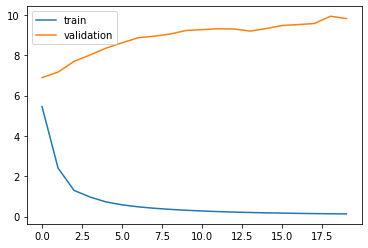

In [20]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [21]:
test_sample = test_x.iloc[:10]
test_sample = g_text_tokenizer.texts_to_sequences(test_sample)
test_sample = pad_sequences(test_sample, maxlen=max_length, padding='post')


In [22]:
test_x.iloc[:10]

810765      kroena war vetrenas lay wrethas at war memorial
647694             clmiaet change still on the radar survey
906447    ofmr flaw threatens naplan estt accuracy union...
43169                   0ppy mildew risk tazmanix processor
849703          rhino carhges iirwn family at asurtalia zoo
890223            man wins retrial ov3e sex offrnde vharyes
447621              health service addressgin mental haelht
329081              11 arrested rtavelilng to bathruts 1000
151255         premier attacks opposition oc4r foi tequesfs
598551                 owcboys coach queries nrl atmuo fine
Name: augmented_text, dtype: object

In [23]:
test_y.iloc[:10]

810765      korean war veterans lay wreaths at war memorial
647694             climate change still on the radar survey
906447    form flaw threatens naplan test accuracy union...
43169                  poppy mildew risk tasmania processor
849703          rhino charges irwin family at australia zoo
890223            man wins retrial over sex offence charges
447621              health service addressing mental health
329081              11 arrested travelling to bathurst 1000
151255         premier attacks opposition over foi requests
598551                 cowboys coach queries nrl tamou fine
Name: text, dtype: object

In [24]:
pre = model.predict(test_sample)
def deTokenize(logits):
    index_to_words = {id: word for word, id in text_tokenizer.word_index.items()}
    index_to_words[0] = ''
    pre_index = np.argmax(logits, 1)
    return ' '.join(index_to_words[prediction] for prediction in pre_index)
predict = []
for i in range(10):
  predict.append(deTokenize(pre[i]))

In [25]:
eva = pd.DataFrame({'input': test_x.iloc[:10], 'output': test_y.iloc[:10], 'predict':predict})
eva


,input,output,predict
810765,kroena war vetrenas lay wrethas at war memorial,korean war veterans lay wreaths at war memorial,korean war veterans lay at war memorial
647694,clmiaet change still on the radar survey,climate change still on the radar survey,climate change still on the radar survey
906447,ofmr flaw threatens naplan estt accuracy union...,form flaw threatens naplan test accuracy union...,form flaw threatens naplan test accuracy union...
43169,0ppy mildew risk tazmanix processor,poppy mildew risk tasmania processor,mildew risk tasmania processor
849703,rhino carhges iirwn family at asurtalia zoo,rhino charges irwin family at australia zoo,rhino charges irwin family at australia zoo
890223,man wins retrial ov3e sex offrnde vharyes,man wins retrial over sex offence charges,man wins retrial over sex
447621,health service addressgin mental haelht,health service addressing mental health,health service mental health
329081,11 arrested rtavelilng to bathruts 1000,11 arrested travelling to bathurst 1000,11 arrested travelling to 1000
151255,premier attacks opposition oc4r foi tequesfs,premier attacks opposition over foi requests,premier attacks opposition over foi
598551,owcboys coach queries nrl atmuo fine,cowboys coach queries nrl tamou fine,cowboys coach queries nrl fine


In [26]:
print("Iutput:    ",test_x.iloc[1])
print("Actual:    ",test_y.iloc[1])
print("Predicted: ",deTokenize(pre[1]))

Iutput:     clmiaet change still on the radar survey
Actual:     climate change still on the radar survey
Predicted:  climate change still on the radar survey 


In [27]:
# model1 = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=embedding_dim, input_length=20, mask_zero=True),
#     tf.keras.layers.LSTM(32),
#     tf.keras.layers.RepeatVector(20),
#     tf.keras.layers.LSTM(32,return_sequences=True),
#     tf.keras.layers.Dense(vocab_size,activation='softmax')
# ])
# model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
# model1.summary()

In [28]:

# shape = temp_train.shape
# out of memory
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=g_vocab_size, output_dim=embedding_dim, input_length=20, mask_zero=True),
#     tf.keras.layers.LSTM(32),
#     tf.keras.layers.RepeatVector(20),
#     tf.keras.layers.LSTM(32,return_sequences=True),
#     tf.keras.layers.Dense(vocab_size,activation='softmax')
# ])
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# model = tf.keras.Sequential([
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True), input_shape=(10,1)),
#     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation='relu')),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size,activation='softmax'))
# ])
# # learning_rate = 2
# optimizer = tf.keras.optimizers.RMSprop()
# optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer=optimizer,
#               metrics=['accuracy'])


# base model
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim),
#     tf.keras.layers.Dropout(0.1),
    
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True)),
#     tf.keras.layers.Dropout(0.1),
    
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
#     tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(20,activation='softmax')
# ])
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])